In [1]:
import pymongo
import re
import numpy
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

client = pymongo.MongoClient(host='localhost', port=27017)
sina = client['Sina']
comments_information = sina['Comments_Information']

In [2]:
def get_sorted_count(collection,query=None,field=None):
    '''
    给定数据库表（collection）、查询条件（query）、field（即为数据项的名，或者key），
    返回一个排序的字典，字典的key为出现的内容元素，value为出现次数
    '''
    data_with_query = collection.find(query) #找到该项
    count = {}
    for d in data_with_query: #遍历符合条件的数据
        if d[field] in count: #如果字典中有该项则加一，没有则新建一个key
            count[d[field]] += 1
        else:
            count[d[field]] = 1

    count_sort = sorted(count.items(), key=lambda item: int(item[1]), reverse=True) #字典排序
    return count_sort

def add_count(count, element_list):
    for element in element_list:
        if str(element) in count.keys():
            count[str(element)] += 1
        else:
            count[str(element)] = 1
    return count

def data_to_csv(data, name, label, normalize = True):
    data = [list(d) for d in data]
    if normalize:
        data_sum = sum([d[1] for d in data])
        for d in data:
            d[1] /= data_sum
    data.insert(0, label)
    data = pd.DataFrame(data)
    data.to_csv(name + '.csv',header = False, index = False, encoding = 'utf-8-sig')
    return data

总人数

In [3]:
comments_information.find().count()

246605

# 性别

填写性别的人数

In [4]:
comments_information.find({'gender': {'$exists':True}}).count()

246429

性别统计

In [5]:
sex = get_sorted_count(comments_information,query={'gender': {'$exists':True}},field='gender')
data_sex = data_to_csv(sex,'性别',['性别','性别比例'])

In [6]:
sex

[('男', 194249), ('女', 52180)]

# 性取向

In [7]:
sex_ori = get_sorted_count(comments_information,query={'sex_orientation': {'$exists':True}},field='sex_orientation')
data_sex_ori = data_to_csv(sex_ori,'性取向',['性取向','性取向比例'])

In [8]:
sex_ori

[('异性恋', 5664), ('同性恋', 666)]

# 情感状态

In [9]:
sentiment = get_sorted_count(comments_information,query={'sentiment': {'$exists':True}},field='sentiment')
data_sentiment = data_to_csv(sentiment,'情感状态',['情感状态','情感状态比例'])

In [10]:
sentiment

[('单身', 6054),
 ('恋爱中', 1101),
 ('求交往', 862),
 ('丧偶', 757),
 ('已婚', 424),
 ('暗恋中', 248),
 ('离异', 103),
 ('订婚', 93),
 ('分居', 89),
 ('暧昧中', 80)]

# VIP等级

In [11]:
vip_level = get_sorted_count(comments_information,query={'vip_level': {'$exists':True}},field='vip_level')
data_vip_level = data_to_csv(vip_level,'VIP等级',['VIP等级','VIP等级比例'])

In [12]:
vip_level

[('未开通', 157965),
 ('1级', 47597),
 ('2级', 12530),
 ('3级', 8359),
 ('5级', 7935),
 ('4级', 7371),
 ('6级', 4591),
 ('7级', 81)]

# 年龄

In [13]:
#birthday有两种可能的形式，一种是日期：YYYY-MM-DD，一种是星座：XX座，
#因为星座占比更小，且基本均匀分布，我们忽略星座
data_with_birthday = comments_information.find({'birthday': {'$exists':True}})
birthday_year_count = {}
for d in data_with_birthday:
    if d['birthday'].find('-')>0: #有-，即birthday为YYYY-MM-DD
        year = d['birthday'].split('-')[0]
        if year in birthday_year_count:
            birthday_year_count[year] += 1
        else:
            birthday_year_count[year] = 1

birthday_count_sort = sorted(birthday_year_count.items(), key=lambda item: int(item[1]), reverse=True)

In [14]:
birthday_year_count

{'0001': 6066,
 '2017': 1666,
 '1997': 16952,
 '2002': 2903,
 '1995': 10414,
 '2018': 2731,
 '2000': 10642,
 '1998': 17834,
 '1936': 11,
 '2011': 191,
 '1999': 14961,
 '1996': 14017,
 '1994': 6710,
 '1970': 2241,
 '2003': 1577,
 '1901': 127,
 '2019': 352,
 '2015': 955,
 '01': 4345,
 '1900': 2170,
 '2004': 1220,
 '1992': 2401,
 '2007': 526,
 '2001': 4773,
 '1910': 13,
 '1949': 181,
 '1930': 17,
 '1990': 1567,
 '1988': 538,
 '2009': 122,
 '2008': 382,
 '1926': 144,
 '1987': 341,
 '1993': 3913,
 '1905': 31,
 '2005': 934,
 '1981': 90,
 '1983': 97,
 '1991': 1370,
 '1918': 40,
 '1980': 99,
 '2006': 867,
 '1984': 137,
 '2014': 504,
 '2016': 1155,
 '1985': 182,
 '1919': 91,
 '1968': 25,
 '2010': 227,
 '1989': 826,
 '1971': 36,
 '1907': 26,
 '1978': 63,
 '1982': 101,
 '1975': 34,
 '1944': 18,
 '1967': 28,
 '1945': 25,
 '1979': 54,
 '1961': 24,
 '2012': 242,
 '1986': 250,
 '1974': 35,
 '1923': 9,
 '1912': 34,
 '2013': 307,
 '0096': 1,
 '1964': 31,
 '1977': 50,
 '1969': 36,
 '1965': 31,
 '1934': 

In [15]:
birthday_count_sort

[('1998', 17834),
 ('1997', 16952),
 ('1999', 14961),
 ('1996', 14017),
 ('2000', 10642),
 ('1995', 10414),
 ('1994', 6710),
 ('0001', 6066),
 ('2001', 4773),
 ('01', 4345),
 ('1993', 3913),
 ('2002', 2903),
 ('2018', 2731),
 ('1992', 2401),
 ('1970', 2241),
 ('1900', 2170),
 ('2017', 1666),
 ('2003', 1577),
 ('1990', 1567),
 ('1991', 1370),
 ('2004', 1220),
 ('2016', 1155),
 ('2015', 955),
 ('2005', 934),
 ('2006', 867),
 ('1989', 826),
 ('1988', 538),
 ('2007', 526),
 ('2014', 504),
 ('2008', 382),
 ('2019', 352),
 ('1987', 341),
 ('2013', 307),
 ('0000', 300),
 ('1986', 250),
 ('2012', 242),
 ('2010', 227),
 ('2011', 191),
 ('1985', 182),
 ('1949', 181),
 ('1926', 144),
 ('1984', 137),
 ('1901', 127),
 ('2009', 122),
 ('1982', 101),
 ('1980', 99),
 ('1983', 97),
 ('1919', 91),
 ('1981', 90),
 ('1978', 63),
 ('1979', 54),
 ('1977', 50),
 ('1960', 49),
 ('1966', 47),
 ('1937', 41),
 ('1904', 41),
 ('1918', 40),
 ('1950', 38),
 ('1976', 38),
 ('1911', 38),
 ('1971', 36),
 ('1969', 36),

In [16]:
data_birthday_count = data_to_csv(birthday_count_sort,'生日',['出生年','出生年比例'])

In [17]:
def classify_birthday(birthday_count_sort):
    birthday = {
        '80前': 0,
        '80后': 0,
        '85后': 0,
        '90后': 0,
        '95后': 0,
        '00后': 0,
        '05后': 0,
        '无效/其他': 0
    }
    for b in birthday_count_sort:
        if int(b[0]) > 2005:
            birthday['05后'] += b[1]
        elif int(b[0]) > 2000:
            birthday['00后'] += b[1]
        elif int(b[0]) > 1995:
            birthday['95后'] += b[1]
        elif int(b[0]) > 1990:
            birthday['90后'] += b[1]
        elif int(b[0]) > 1985:
            birthday['85后'] += b[1]
        elif int(b[0]) > 1980:
            birthday['80后'] += b[1]
        elif int(b[0]) > 1940:
            birthday['80前'] += b[1]
        else:
            birthday['无效/其他'] += b[1]
    return birthday

In [18]:
birthday_classfied = classify_birthday(birthday_count_sort)

In [19]:
birthday_classfied

{'80前': 3529,
 '80后': 607,
 '85后': 3522,
 '90后': 24808,
 '95后': 74406,
 '00后': 11407,
 '05后': 10251,
 '无效/其他': 14001}

In [20]:
birthday_classfied_sort = sorted(birthday_classfied.items(), key=lambda item: int(item[1]), reverse=True)
birthday_classfied = data_to_csv(birthday_classfied_sort,'年龄段',['年龄段','比例'])

# 标签

In [21]:
data_with_label = comments_information.find({'labels': {'$exists':True}})
label_count = {}
for d in data_with_label:
    if d['labels'].find(',')>0: #有多个标签
        for label in d['labels'].split(','):
            if label in label_count:
                label_count[label] += 1
            else:
                label_count[label] = 1
    else:
        label = d['labels']
        if label in label_count:
            label_count[label] += 1
        else:
            label_count[label] = 1
label_count_sort = sorted(label_count.items(), key=lambda item: int(item[1]), reverse=True)

In [22]:
label_count_sort

[('搞笑幽默', 14209),
 ('名人明星', 6017),
 ('美女', 5324),
 ('动漫', 4728),
 ('旅游', 4406),
 ('视频音乐', 4401),
 ('八卦杂谈', 4361),
 ('体育资讯', 4279),
 ('游戏动漫', 4085),
 ('娱乐', 3707),
 ('体育', 3477),
 ('IT数码', 3476),
 ('校园生活', 3271),
 ('美食', 3088),
 ('新闻趣事', 2603),
 ('微博奇葩', 2214),
 ('文艺', 1919),
 ('美图摄影', 1599),
 ('视频电影', 1576),
 ('音乐', 1569),
 ('科学探索', 1425),
 ('IT科技', 1280),
 ('新闻热点', 1145),
 ('星座命理', 1056),
 ('汽车', 1000),
 ('时尚', 978),
 ('军事', 972),
 ('读书分享', 960),
 ('星座运势', 754),
 ('游戏', 717),
 ('90后', 652),
 ('新闻资讯', 639),
 ('健康', 567),
 ('车世界', 563),
 ('萌宠', 534),
 ('重口味', 505),
 ('自媒体', 491),
 ('电影', 460),
 ('学生', 454),
 ('其他生活', 422),
 ('情感生活', 416),
 ('教育就业', 354),
 ('篮球', 346),
 ('宅', 345),
 ('投资理财', 332),
 ('听歌', 323),
 ('宠物图集', 315),
 ('自由', 281),
 ('NBA', 257),
 ('足球', 256),
 ('穿衣美容', 233),
 ('成都生活', 223),
 ('睡觉', 219),
 ('军事天地', 206),
 ('综艺娱乐', 204),
 ('教育', 204),
 ('美容服饰', 196),
 ('创意设计', 194),
 ('旅行', 190),
 ('吃货', 176),
 ('北京生活', 162),
 ('吃', 161),
 ('财经资讯', 160),
 ('运动', 155),
 ('重庆生活', 1

In [23]:
data_label = data_to_csv(label_count_sort,'标签',['标签','标签比例'])

In [24]:
pd.concat([data_sex,data_label],axis = 1).to_csv('test.csv',header = False, index = False, encoding = 'utf-8-sig')

# 微博数

In [26]:
def get_all_data(collection, query=None, field=None):
    data_with_query = collection.find(query)
    data_list = []
    for d in data_with_query:
        data_list.append(d[field])
    return data_list

In [27]:
number_weibos = get_all_data(comments_information,query={'tweets_num': {'$exists':True}},field='tweets_num')

# 关注数

In [28]:
number_follows = get_all_data(comments_information,query={'follows_num': {'$exists':True}},field='follows_num')

# 粉丝数

In [29]:
number_fans = get_all_data(comments_information,query={'fans_num': {'$exists':True}},field='fans_num')

# 用户聚类-使用微博数、关注数、粉丝数三个维度

In [31]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [32]:
data=np.array([number_weibos,number_follows,number_fans])
data=data.T
print(data.shape)

(246595, 3)


In [33]:
print(data)

[[ 20  77  23]
 [ 14  79  10]
 [786 593 316]
 ...
 [  0 177   8]
 [  9   8   1]
 [  0   7   1]]


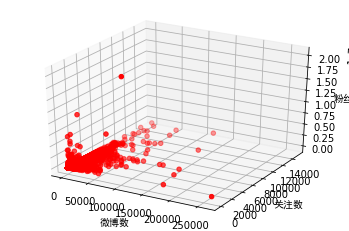

KeyboardInterrupt: 

In [34]:


num = 6

fig1 = plt.figure('data')
ax1 = fig1.add_subplot(111, projection='3d')
ax1.scatter(data[:, 0], data[:, 1], data[:, 2], c='r', marker='o')
ax1.set_xlabel(u'微博数', fontproperties='SimHei')
ax1.set_ylabel(u'关注数', fontproperties='SimHei')
ax1.set_zlabel(u'粉丝数', fontproperties='SimHei')
plt.show()
#plt.savefig('data.png')

random_state = 170
pred = KMeans(n_clusters=num, random_state=random_state).fit_predict(data)


def guilei(pred, data, n):
    p = []
    for m in range(n):
        p.append(np.zeros([n, 3], dtype=float))
    l = len(pred)
    for _ in range(l):
        for m in range(n):
            if pred[_] == m:
                p[m] = np.append(p[m], data[_])
    return p


p = guilei(pred, data, num)

fig = plt.figure('kmeans_result')
ax = fig.add_subplot(111, projection='3d')
color = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w', '#DA70D6', '#8B008B', '#483D8B', '00FFFF', '#556B2F']
for i in range(num):
    p[i] = p[i].reshape(-1, 3)
    ax.scatter(p[i][:, 0], p[i][:, 1], p[i][:, 2], c=color[i], marker='o')
ax.set_xlabel(u'微博数', fontproperties='SimHei')
ax.set_ylabel(u'关注数', fontproperties='SimHei')
ax.set_zlabel(u'粉丝数', fontproperties='SimHei')
#plt.savefig('julei8.png')
plt.show()
